In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflow_federated as tff

In [113]:
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
import torch
import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf

In [114]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [115]:
train_dataset = train.flow_from_directory('Dataset0/training/',
                                         target_size = (299,299),
                                         batch_size = 16,
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset = train.flow_from_directory('Dataset1/testing/',
                                         target_size = (299,299),
                                         batch_size = 15,
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset = train.flow_from_directory('Dataset0/validation/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 4035 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 300 images belonging to 3 classes.


In [116]:
validation_dataset.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [117]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (299,299,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(256,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                                   ])

In [119]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 297, 297, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 78400)            

In [120]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [121]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 25,
                     validation_data = validation_dataset)

Epoch 1/25
5/5 [==============================] - 10s 2s/step - loss: 1.7793 - accuracy: 0.4000 - val_loss: 1.6559 - val_accuracy: 0.3333
Epoch 2/25
5/5 [==============================] - 8s 2s/step - loss: 1.8088 - accuracy: 0.2000 - val_loss: 1.0829 - val_accuracy: 0.3333
Epoch 3/25
5/5 [==============================] - 8s 2s/step - loss: 1.1730 - accuracy: 0.4250 - val_loss: 1.0862 - val_accuracy: 0.3333
Epoch 4/25
5/5 [==============================] - 8s 2s/step - loss: 1.1677 - accuracy: 0.4000 - val_loss: 1.1193 - val_accuracy: 0.3333
Epoch 5/25
5/5 [==============================] - 8s 2s/step - loss: 1.2216 - accuracy: 0.2000 - val_loss: 1.1211 - val_accuracy: 0.3333
Epoch 6/25
5/5 [==============================] - 8s 2s/step - loss: 0.9036 - accuracy: 0.4000 - val_loss: 1.3606 - val_accuracy: 0.3333
Epoch 7/25
5/5 [==============================] - 8s 2s/step - loss: 1.4361 - accuracy: 0.0000e+00 - val_loss: 1.0678 - val_accuracy: 0.3333
Epoch 8/25
5/5 [====================

In [122]:
dir_path = 'Dataset1/testing'
for i in os.listdir(dir_path ):
    print(i)

COVID-1001.png
COVID-1002.png
COVID-1003.png
COVID-1004.png
COVID-1005.png
COVID-1006.png
COVID-1007.png
COVID-1008.png
COVID-1009.png
COVID-1010.png
COVID-1011.png
COVID-1012.png
Normal-1001.png
Normal-1002.png
Normal-1003.png
Normal-1004.png
Normal-1005.png
Normal-1006.png
Normal-1007.png
Normal-1008.png
Normal-1009.png
Normal-1010.png
Normal-1011.png
Normal-1012.png
Viral Pneumonia-1001.png
Viral Pneumonia-1002.png
Viral Pneumonia-1003.png
Viral Pneumonia-1004.png
Viral Pneumonia-1005.png
Viral Pneumonia-1006.png
Viral Pneumonia-1007.png
Viral Pneumonia-1008.png
Viral Pneumonia-1009.png
Viral Pneumonia-1010.png
Viral Pneumonia-1011.png
Viral Pneumonia-1012.png


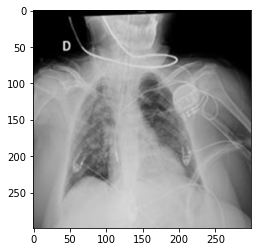

[1]


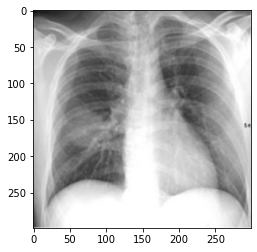

[1]


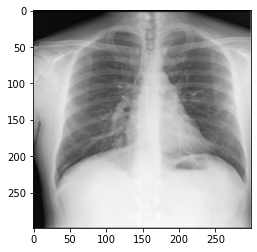

[1]


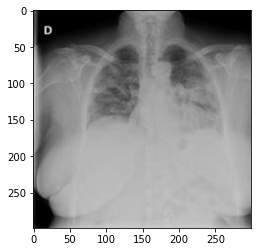

[1]


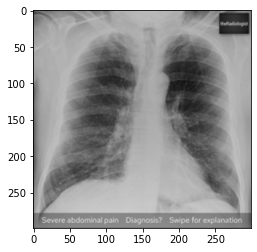

[1]


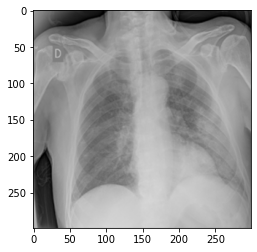

[1]


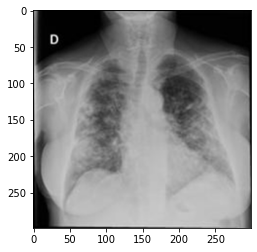

[1]


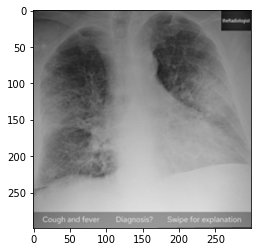

[1]


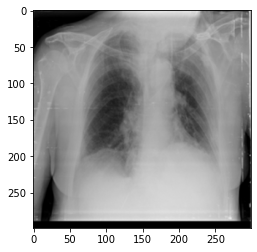

[1]


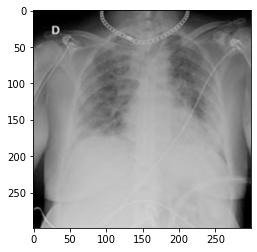

[1]


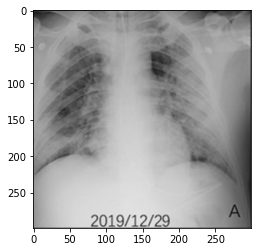

[1]


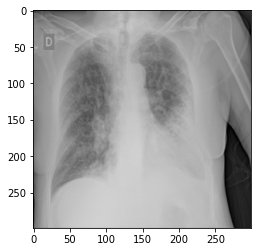

[1]


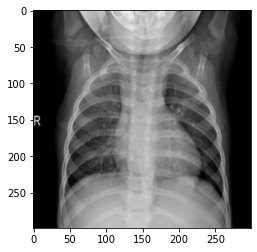

[2]


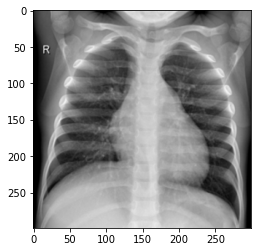

[1]


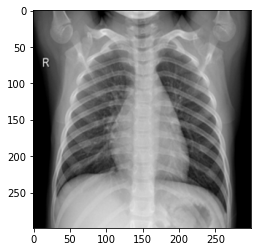

[1]


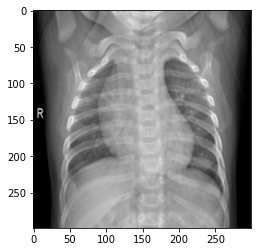

[2]


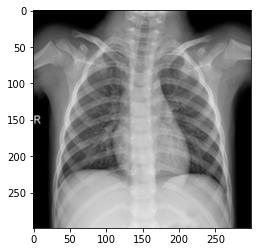

[1]


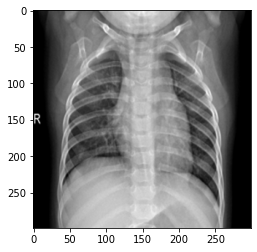

[2]


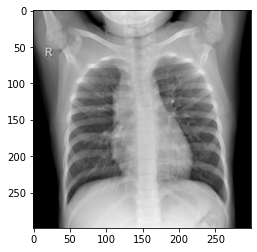

[1]


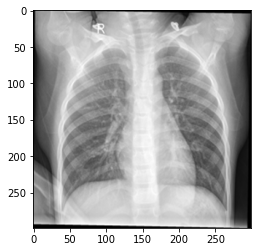

[1]


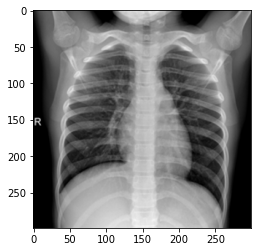

[1]


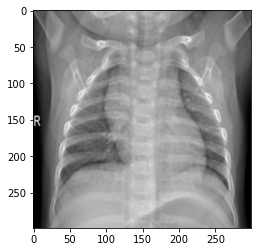

[1]


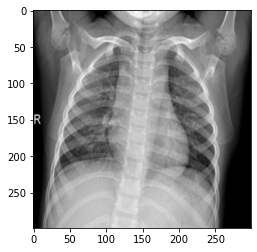

[1]


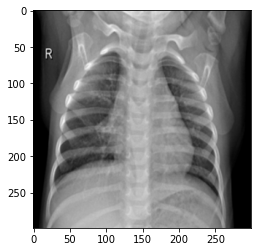

[2]


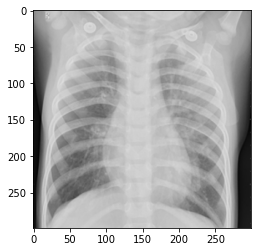

[1]


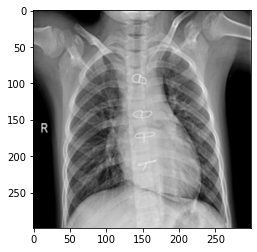

[1]


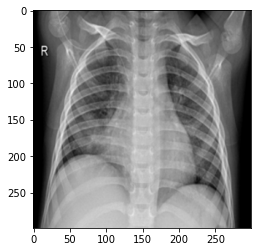

[1]


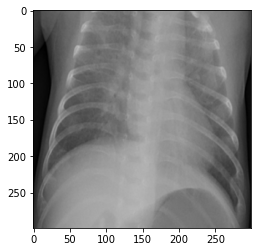

[1]


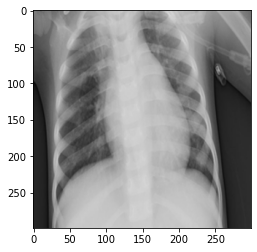

[2]


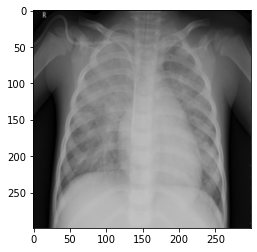

[1]


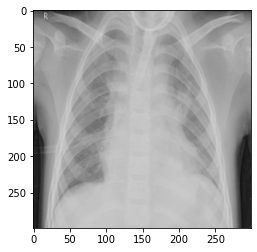

[1]


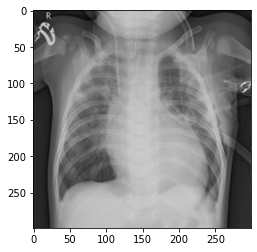

[1]


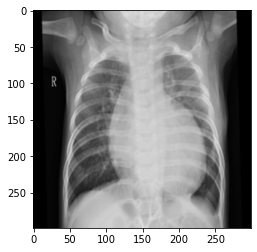

[2]


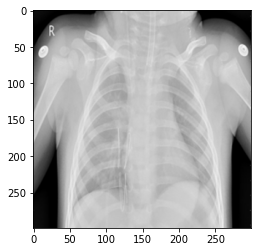

[1]


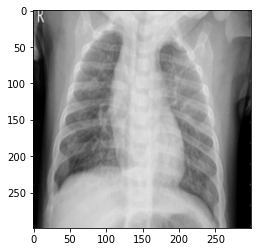

[2]


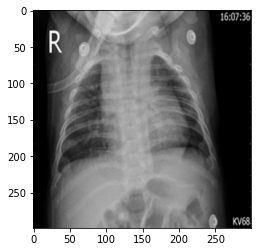

[1]


In [123]:
dir_path = 'Dataset1/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+i, target_size = (299,299))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    val2 = np.argmax(val, axis=-1)
    print(val2)

In [124]:
predictions = model.predict(x=validation_dataset, verbose=0)

In [125]:
for i in predictions:
    print(i)

[0.13498731 0.84133625 0.02367646]
[0.21370225 0.7050098  0.08128791]
[0.21259233 0.663927   0.12348059]
[0.1936164  0.75296056 0.05342302]
[0.20655881 0.72094643 0.07249478]
[0.20739555 0.6964309  0.09617352]
[0.20544434 0.7172635  0.07729214]
[0.21939471 0.66455334 0.11605199]
[0.20869218 0.6168152  0.1744926 ]
[0.15886131 0.80739033 0.03374832]
[0.20847622 0.72948515 0.06203862]
[0.18586798 0.767776   0.04635599]
[0.1574543  0.80095565 0.04159003]
[0.17291874 0.72219086 0.10489033]
[0.17001176 0.7841027  0.04588554]
[0.1888223  0.72784114 0.08333653]
[0.2162539  0.7399571  0.04378901]
[0.21789357 0.7300307  0.05207564]
[0.16550069 0.7493439  0.08515539]
[0.18036959 0.77456087 0.04506958]
[0.19992007 0.7577809  0.04229909]
[0.2006619  0.7499255  0.04941269]
[0.21917105 0.6780848  0.10274413]
[0.22031383 0.71176654 0.06791963]
[0.19224593 0.74785304 0.05990099]
[0.2060609  0.66627127 0.12766783]
[0.19397299 0.7377117  0.06831526]
[0.21118063 0.675889   0.11293034]
[0.21481381 0.704917

In [126]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [127]:
#pred = [1 * (x[0]>=0.5) for x in preds_sigmoid]
#rounded_predictions = [1*(x[0]>=0.5) for x in predictions]

In [128]:
for i in rounded_predictions:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
2
2
2
1
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
2
2
2
2
2
2
1
2
2
1
2
2
1
1
2
2
2
1
2
2
2
1
1
1
2
2
2
2
2
2
1
2
2
2
2
2


Confusion Matrix

In [129]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [130]:
cm = confusion_matrix(y_true=validation_dataset.classes, y_pred=rounded_predictions)

In [131]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0 100   0]
 [  0 100   0]
 [  0  40  60]]


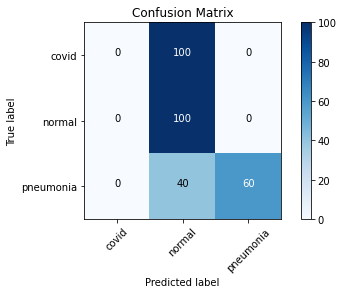

In [132]:
cm_plot_labels = ['covid', 'normal', 'pneumonia']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')